<a href="https://colab.research.google.com/github/billycemerson/quantitative-finance-project/blob/main/02_traditional_ts/garch_family.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance arch

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from arch import arch_model
from statsmodels.stats.diagnostic import het_arch
from statsmodels.graphics.tsaplots import plot_acf

#### Data

In [ ]:
ticker = "BBCA.JK"
start_date="2021-01-01"
end_date="2024-12-31"

In [ ]:
data = yf.download(
    ticker,
    start=start_date,
    end=end_date,
    interval="1d",
    progress=False
)

data = data[['Close']].dropna()
data.head()

/tmp/ipython-input-3957227690.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(


Price,Close
Ticker,BBCA.JK
Date,
2021-01-04,6028.375000
2021-01-05,6253.281738
2021-01-06,6125.393066
2021-01-07,6143.032715
2021-01-08,6218.001465


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 969 entries, 2021-01-04 to 2024-12-30
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (Close, BBCA.JK)  969 non-null    float64
dtypes: float64(1)
memory usage: 15.1 KB


#### Return

In [ ]:
returns = 100 * np.log(data['Close']).diff().dropna()
returns.name = "log_return"
returns.head()

Ticker,BBCA.JK
Date,
2021-01-05,3.662892
2021-01-06,-2.066348
2021-01-07,0.287562
2021-01-08,1.213000
2021-01-11,4.099229


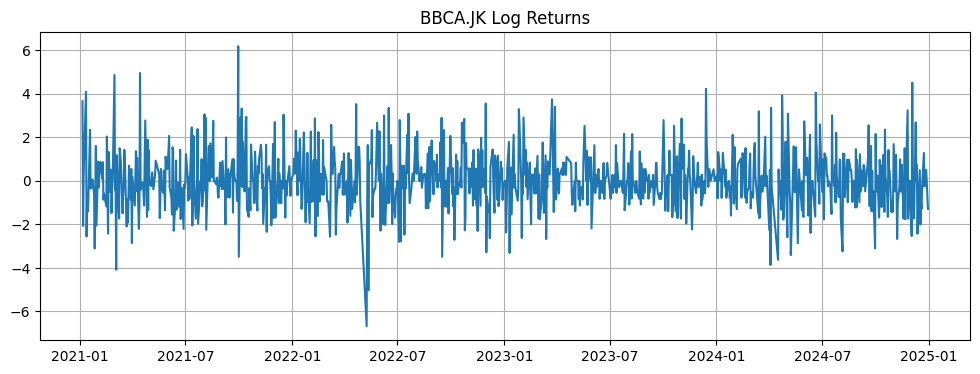

In [ ]:
# Return series
plt.figure(figsize=(12,4))
plt.plot(returns)
plt.title(f"{ticker} Log Returns")
plt.grid(True)
plt.show()

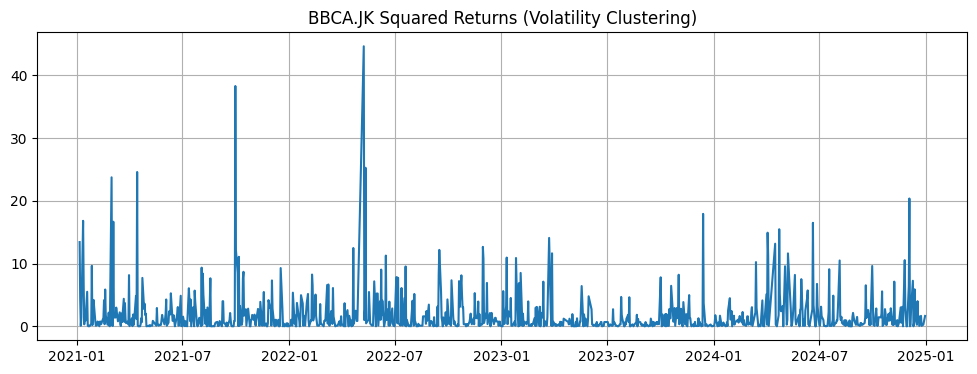

In [ ]:
# Volatility clustering
plt.figure(figsize=(12,4))
plt.plot(returns**2)
plt.title(f"{ticker} Squared Returns (Volatility Clustering)")
plt.grid(True)
plt.show()

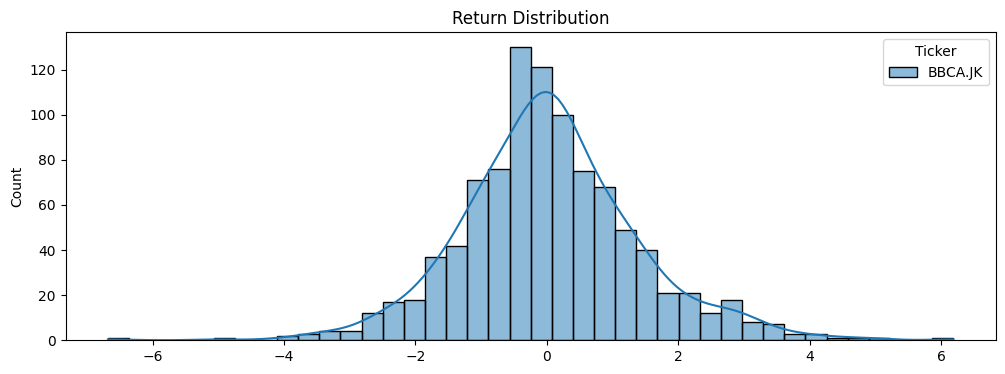

In [ ]:
# Return distributions
plt.figure(figsize=(12,4))
sns.histplot(returns, kde=True)
plt.title("Return Distribution")
plt.show()

#### ARCH Effect Diagnostics

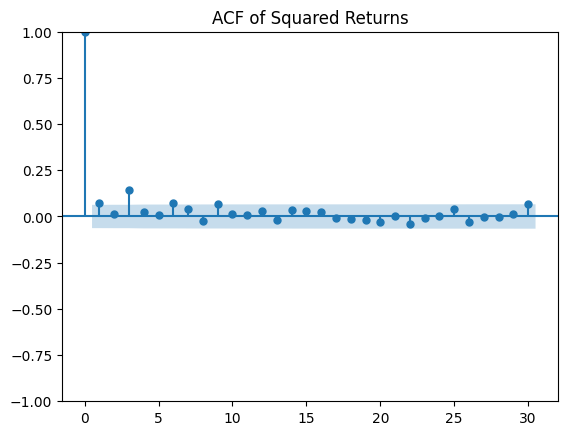

In [ ]:
# ACF return
plot_acf(returns**2, lags=30)
plt.title("ACF of Squared Returns")
plt.show()

In [ ]:
# ARCH-LM test
lm_stat, lm_pvalue, _, _ = het_arch(returns)

print("ARCH LM Test")
print(f"LM Statistic: {lm_stat:.4f}")
print(f"p-value     : {lm_pvalue:.4f}")

ARCH LM Test
LM Statistic: 32.8753
p-value     : 0.0003


p-value < 0.05 → ARCH effect present → GARCH justified

#### ARCH Model

In [ ]:
# ARCH Baseline
arch_model_ = arch_model(
    returns,
    mean='Zero',
    vol='ARCH',
    p=5
)

arch_result = arch_model_.fit(disp='off')
print(arch_result.summary())

                        Zero Mean - ARCH Model Results                        
Dep. Variable:                BBCA.JK   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.001
Vol Model:                       ARCH   Log-Likelihood:               -1657.52
Distribution:                  Normal   AIC:                           3327.05
Method:            Maximum Likelihood   BIC:                           3356.30
                                        No. Observations:                  968
Date:                Fri, Dec 26 2025   Df Residuals:                      968
Time:                        15:16:50   Df Model:                            0
                               Volatility Model                              
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          1.4663      0.172      8.535  1.399e-17 

#### GARCH Models

In [ ]:
# GARCH(1,1)
garch_11 = arch_model(
    returns,
    mean='Zero',
    vol='GARCH',
    p=1,
    q=1
)

garch_11_result = garch_11.fit(disp='off')
print(garch_11_result.summary())

                       Zero Mean - GARCH Model Results                        
Dep. Variable:                BBCA.JK   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.001
Vol Model:                      GARCH   Log-Likelihood:               -1654.98
Distribution:                  Normal   AIC:                           3315.97
Method:            Maximum Likelihood   BIC:                           3330.59
                                        No. Observations:                  968
Date:                Fri, Dec 26 2025   Df Residuals:                      968
Time:                        15:16:50   Df Model:                            0
                             Volatility Model                             
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.2071      0.104      1.992  4.643e-02 [3.280e-0

In [ ]:
# GARCH(p,q)
garch_22 = arch_model(
    returns,
    mean='Zero',
    vol='GARCH',
    p=2,
    q=2
)

garch_22_result = garch_22.fit(disp='off')
print(garch_22_result.summary())

                       Zero Mean - GARCH Model Results                        
Dep. Variable:                BBCA.JK   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.001
Vol Model:                      GARCH   Log-Likelihood:               -1653.93
Distribution:                  Normal   AIC:                           3317.86
Method:            Maximum Likelihood   BIC:                           3342.24
                                        No. Observations:                  968
Date:                Fri, Dec 26 2025   Df Residuals:                      968
Time:                        15:16:50   Df Model:                            0
                               Volatility Model                              
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.2751      0.226      1.218      0.223 

#### EGARCH (Asymmetry + No Positivity Constraint)

In [ ]:
egarch = arch_model(
    returns,
    mean='Zero',
    vol='EGARCH',
    p=1,
    q=1
)

egarch_result = egarch.fit(disp='off')
print(egarch_result.summary())

                       Zero Mean - EGARCH Model Results                       
Dep. Variable:                BBCA.JK   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.001
Vol Model:                     EGARCH   Log-Likelihood:               -1656.46
Distribution:                  Normal   AIC:                           3318.93
Method:            Maximum Likelihood   BIC:                           3333.55
                                        No. Observations:                  968
Date:                Fri, Dec 26 2025   Df Residuals:                      968
Time:                        15:16:50   Df Model:                            0
                              Volatility Model                             
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.0642  5.215e-02      1.231      0.218 [-3.79

#### TGARCH (Treshold GARCH)

In [ ]:
tgarch = arch_model(
    returns,
    mean='Zero',
    vol='GARCH',
    p=1,
    o=1,   # threshold term
    q=1,
    power=1.0
)

tgarch_result = tgarch.fit(disp='off')
print(tgarch_result.summary())

                    Zero Mean - TARCH/ZARCH Model Results                     
Dep. Variable:                BBCA.JK   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.001
Vol Model:                TARCH/ZARCH   Log-Likelihood:               -1656.44
Distribution:                  Normal   AIC:                           3320.88
Method:            Maximum Likelihood   BIC:                           3340.38
                                        No. Observations:                  968
Date:                Fri, Dec 26 2025   Df Residuals:                      968
Time:                        15:16:50   Df Model:                            0
                              Volatility Model                             
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.0948  8.804e-02      1.077      0.281 [-7.77

#### GJR-GARCH (Leverage Effect)

In [ ]:
gjr = arch_model(
    returns,
    mean='Zero',
    vol='GARCH',
    p=1,
    o=1,
    q=1
)

gjr_result = gjr.fit(disp='off')
print(gjr_result.summary())

                     Zero Mean - GJR-GARCH Model Results                      
Dep. Variable:                BBCA.JK   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.001
Vol Model:                  GJR-GARCH   Log-Likelihood:               -1653.57
Distribution:                  Normal   AIC:                           3315.14
Method:            Maximum Likelihood   BIC:                           3334.64
                                        No. Observations:                  968
Date:                Fri, Dec 26 2025   Df Residuals:                      968
Time:                        15:16:51   Df Model:                            0
                              Volatility Model                             
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.1381      0.164      0.842      0.400    [ -

#### Model Comparison

In [ ]:
comparison = pd.DataFrame({
    "Model": ["ARCH(5)", "GARCH(1,1)", "GARCH(2,2)", "EGARCH", "TGARCH", "GJR-GARCH"],
    "AIC": [
        arch_result.aic,
        garch_11_result.aic,
        garch_22_result.aic,
        egarch_result.aic,
        tgarch_result.aic,
        gjr_result.aic
    ],
    "BIC": [
        arch_result.bic,
        garch_11_result.bic,
        garch_22_result.bic,
        egarch_result.bic,
        tgarch_result.bic,
        gjr_result.bic
    ]
})

comparison.sort_values("AIC")

,Model,AIC,BIC
5,GJR-GARCH,3315.135067,3334.635995
1,"GARCH(1,1)",3315.965029,3330.590725
2,"GARCH(2,2)",3317.861884,3342.238044
3,EGARCH,3318.926494,3333.552190
4,TGARCH,3320.876076,3340.377005
0,ARCH(5),3327.048505,3356.299897


#### Forecast

In [ ]:
split_idx = -30  # last 30 observations for test

train_data = returns.iloc[:split_idx]
test_data  = returns.iloc[split_idx:]

In [ ]:
horizon = len(test_data)

vol_forecast = gjr_result.forecast(
    horizon=horizon,
    start=train_data.index[-1]
)

# Forecasted variance → volatility
forecasted_variance = vol_forecast.variance.iloc[-1]
forecasted_volatility = np.sqrt(forecasted_variance)

In [ ]:
forecasted_volatility.index = test_data.index

In [ ]:
cond_vol = gjr_result.conditional_volatility

In [ ]:
train_vol = cond_vol.loc[train_data.index]
test_vol  = cond_vol.loc[test_data.index]

In [ ]:
def plot_garch_vol_full_history(
    train_vol,
    test_vol,
    forecast_vol,
    ticker
):
    plt.figure(figsize=(12, 6))

    plt.plot(
        train_vol.index,
        train_vol.values,
        label='In-sample Volatility'
    )

    plt.plot(
        test_vol.index,
        test_vol.values,
        label='Actual Volatility',
        color='black'
    )

    plt.plot(
        forecast_vol.index,
        forecast_vol.values,
        label='Forecast Volatility',
        color='red'
    )

    plt.title(f'{ticker} - GARCH Volatility Forecast (Full History)')
    plt.xlabel('Date')
    plt.ylabel('Volatility')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def plot_garch_vol_zoomed(
    train_vol,
    test_vol,
    forecast_vol,
    ticker,
    zoom_window=50
):
    zoom_start = train_vol.index[-zoom_window]

    plt.figure(figsize=(12, 6))

    plt.plot(
        train_vol.loc[zoom_start:].index,
        train_vol.loc[zoom_start:].values,
        label='In-sample Volatility'
    )

    plt.plot(
        test_vol.index,
        test_vol.values,
        label='Actual Volatility',
        color='black'
    )

    plt.plot(
        forecast_vol.index,
        forecast_vol.values,
        label='Forecast Volatility',
        color='red'
    )

    plt.xlim(
        zoom_start,
        test_vol.index[-1]
    )

    plt.title(f'{ticker} - Zoomed GARCH Volatility Forecast')
    plt.xlabel('Date')
    plt.ylabel('Volatility')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

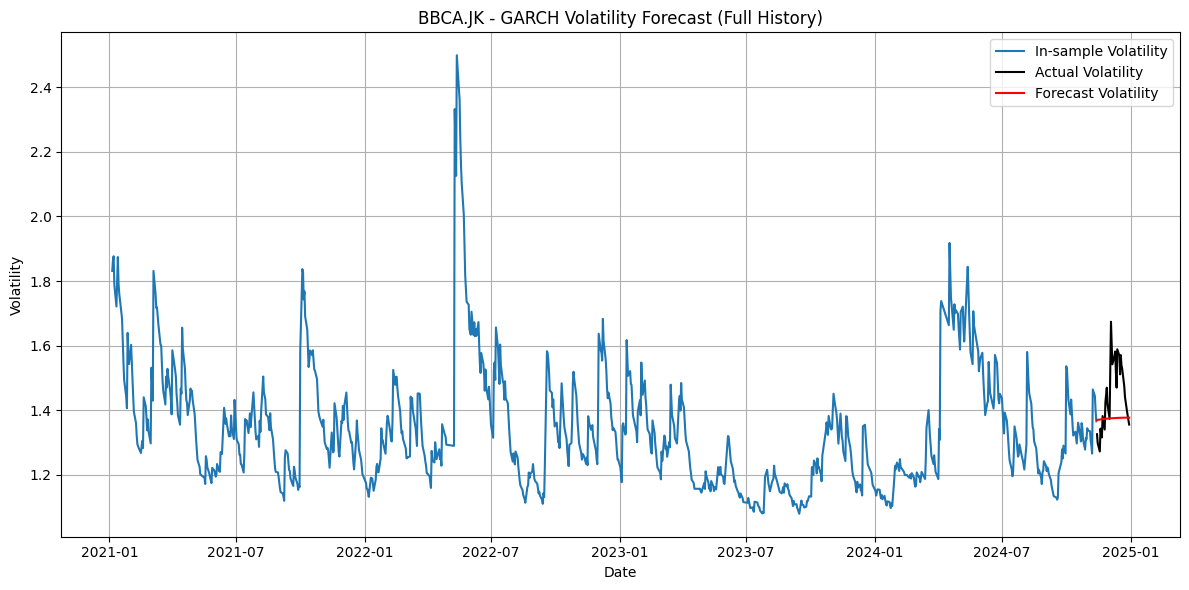

In [ ]:
plot_garch_vol_full_history(
    train_vol=train_vol,
    test_vol=test_vol,
    forecast_vol=forecasted_volatility,
    ticker=ticker
)

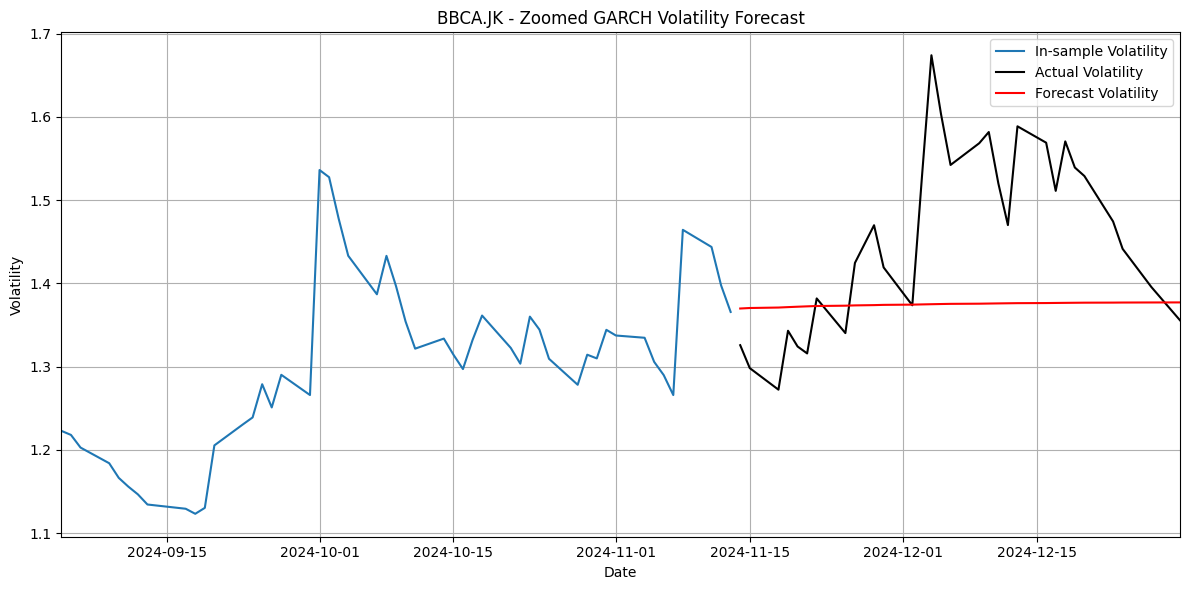

In [ ]:
plot_garch_vol_zoomed(
    train_vol=train_vol,
    test_vol=test_vol,
    forecast_vol=forecasted_volatility,
    ticker=ticker,
    zoom_window=50
)